Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Loading data.

In [2]:
df_meth = pd.read_csv("Gas_sensor_data/ethylene_methane.txt", skiprows=1, sep='\s+')
df_meth.columns = ['Time', 'Methane', 'Ethylene'] + [f'Sensor_{i}' for i in range(1, 17)]

In [3]:
df_meth

,Time,Methane,Ethylene,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
0,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
1,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
2,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
3,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59
4,0.05,0.0,0.0,-48.43,2058.64,-32.61,18.59,9.61,-28.89,-12.19,0.65,3463.35,2748.74,4037.97,4023.88,4486.47,5058.09,3650.60,3111.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178498,41790.15,0.0,0.0,2348.01,1599.24,1329.94,1488.62,1031.11,1431.76,1335.58,1506.05,3300.43,2634.70,1156.91,975.15,972.41,929.27,1211.47,948.94
4178499,41790.16,0.0,0.0,2341.81,1605.37,1333.28,1479.61,1022.80,1421.56,1336.00,1500.45,3277.72,2640.67,1155.49,975.15,963.60,938.42,1222.74,937.25
4178500,41790.17,0.0,0.0,2345.78,1604.06,1337.47,1475.10,1022.61,1423.68,1345.63,1504.76,3299.56,2622.24,1153.47,964.18,978.68,949.92,1204.32,921.50
4178501,41790.18,0.0,0.0,2350.25,1594.86,1323.68,1492.49,1041.03,1434.53,1338.72,1508.85,3296.69,2640.15,1150.03,971.04,976.92,940.76,1212.09,946.99


Checking for null values if any.

In [4]:
df_meth.isnull().sum() 

Time         0
Methane      0
Ethylene     0
Sensor_1     0
Sensor_2     0
Sensor_3     0
Sensor_4     0
Sensor_5     0
Sensor_6     0
Sensor_7     0
Sensor_8     0
Sensor_9     0
Sensor_10    0
Sensor_11    0
Sensor_12    0
Sensor_13    0
Sensor_14    0
Sensor_15    0
Sensor_16    0
dtype: int64

In [5]:
df_meth.tail()

,Time,Methane,Ethylene,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
4178498,41790.15,0.0,0.0,2348.01,1599.24,1329.94,1488.62,1031.11,1431.76,1335.58,1506.05,3300.43,2634.70,1156.91,975.15,972.41,929.27,1211.47,948.94
4178499,41790.16,0.0,0.0,2341.81,1605.37,1333.28,1479.61,1022.80,1421.56,1336.00,1500.45,3277.72,2640.67,1155.49,975.15,963.60,938.42,1222.74,937.25
4178500,41790.17,0.0,0.0,2345.78,1604.06,1337.47,1475.10,1022.61,1423.68,1345.63,1504.76,3299.56,2622.24,1153.47,964.18,978.68,949.92,1204.32,921.50
4178501,41790.18,0.0,0.0,2350.25,1594.86,1323.68,1492.49,1041.03,1434.53,1338.72,1508.85,3296.69,2640.15,1150.03,971.04,976.92,940.76,1212.09,946.99
4178502,41790.19,0.0,0.0,2348.01,1598.80,1338.93,1490.34,1033.49,1405.23,1337.68,1518.34,3292.95,2633.40,1152.05,977.51,984.96,934.14,1201.46,932.38


In [6]:
df_meth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178503 entries, 0 to 4178502
Data columns (total 19 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Time       float64
 1   Methane    float64
 2   Ethylene   float64
 3   Sensor_1   float64
 4   Sensor_2   float64
 5   Sensor_3   float64
 6   Sensor_4   float64
 7   Sensor_5   float64
 8   Sensor_6   float64
 9   Sensor_7   float64
 10  Sensor_8   float64
 11  Sensor_9   float64
 12  Sensor_10  float64
 13  Sensor_11  float64
 14  Sensor_12  float64
 15  Sensor_13  float64
 16  Sensor_14  float64
 17  Sensor_15  float64
 18  Sensor_16  float64
dtypes: float64(19)
memory usage: 605.7 MB


In [7]:
df_meth.describe()

,Time,Methane,Ethylene,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
count,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06,4.178503e+06
mean,2.089566e+04,5.808504e+01,4.369479e+00,2.520157e+03,1.711449e+03,2.756597e+03,3.035849e+03,1.863259e+03,2.386330e+03,2.689914e+03,2.978963e+03,3.541804e+03,2.823842e+03,2.301598e+03,2.024605e+03,1.687490e+03,1.806278e+03,2.309401e+03,1.862996e+03
std,1.206404e+04,7.663942e+01,5.521296e+00,2.532014e+02,1.184761e+02,1.150494e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,1.229723e+03,2.607058e+02,2.002925e+02,9.875313e+02,8.246304e+02,9.865589e+02,1.102381e+03,9.652521e+02,7.658041e+02
min,1.000000e-02,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,-1.187000e+01,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,1.660440e+03,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,3.136350e+03,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03
75%,3.134325e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,4.083020e+03,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,5.820370e+03,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03


Making time column a datetime column

In [8]:
df_meth['Time'] = pd.to_timedelta(df_meth['Time'], unit='s')

In [9]:
df_meth.head(2)

,Time,Methane,Ethylene,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
0,0 days 00:00:00.010000,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
1,0 days 00:00:00.020000,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24


Setting time in seconds

In [10]:
df_meth = df_meth.set_index('Time')

Re- adjusting the time from seconds to minutes

In [11]:
df_meth_minute = df_meth.resample('1T').mean()

/tmp/ipykernel_159263/3402484941.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_meth_minute = df_meth.resample('1T').mean()


In [12]:
df_meth_minute.head(2)

,Methane,Ethylene,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
Time,,,,,,,,,,,,,,,,,,
0 days 00:00:00.010000,0.000000,0.0,2227.590808,2049.965821,3460.227628,3812.660613,2490.920260,3129.629853,2886.546714,3208.051157,3482.733914,2780.119648,2992.039098,2883.695039,2790.420370,3143.886878,2638.824839,2241.759997
0 days 00:01:00.010000,44.443333,0.0,2199.673677,2004.985553,1485.952337,1635.067575,938.478388,1217.331982,1353.527252,1462.300412,3275.688408,2637.498068,1316.160947,1146.061055,919.812842,929.331108,1285.843852,1006.344523


Converting into hourly data to hour analysis.

In [13]:
df_meth_hourly = df_meth_minute.resample('1H').mean()

/tmp/ipykernel_159263/4161952634.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_meth_hourly = df_meth_minute.resample('1H').mean()


In [14]:
df_meth_hourly

,Methane,Ethylene,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
Time,,,,,,,,,,,,,,,,,,
0 days 00:00:00.010000,48.149279,2.517231,2247.253569,1883.468997,2280.257110,2524.909422,1573.196316,2035.522055,2237.867382,2476.201376,3236.836416,2592.962722,1909.206967,1720.517627,1439.619124,1521.416315,1925.998135,1562.555663
0 days 01:00:00.010000,79.037457,6.354884,2553.361342,1767.677582,3364.866624,3708.750346,2424.554242,3038.414467,3272.663154,3639.236960,3568.949390,2833.930605,2755.764453,2452.420572,2177.585923,2358.634935,2761.954020,2233.680150
0 days 02:00:00.010000,70.739496,3.663500,2378.624821,1757.245480,2758.972672,3050.260603,1971.226493,2531.667524,2667.622436,2972.682468,3468.041140,2765.952511,2234.862156,2004.652154,1770.895368,1917.876080,2236.644960,1821.131968
0 days 03:00:00.010000,63.236433,4.856124,2560.558245,1755.660551,2861.121705,3144.446904,1828.656761,2337.650920,2809.624173,3104.483941,3531.277514,2819.365738,2416.439833,2117.628887,1649.084530,1771.837749,2424.716076,1953.552645
0 days 04:00:00.010000,75.675453,2.558141,2430.749403,1702.141023,2687.560740,2981.483764,2095.507603,2706.952076,2548.669547,2870.161542,3425.725167,2731.781374,2075.459910,1912.229610,1895.570909,2028.024716,2063.887111,1705.999612
0 days 05:00:00.010000,51.576070,4.351411,2511.502267,1759.359651,2572.002663,2831.444671,1697.136676,2188.042325,2530.393966,2788.924533,3551.132505,2831.487036,2184.827708,1898.470143,1539.487585,1642.077419,2206.268077,1767.381239
0 days 06:00:00.010000,70.089525,6.919030,2684.580973,1717.317962,3351.369651,3671.685079,2133.590160,2699.424256,3262.634216,3598.811518,3719.789553,2954.345517,2839.701502,2455.628153,1926.682437,2080.871736,2826.041172,2270.574321
0 days 07:00:00.010000,57.747871,3.264562,2497.795016,1677.785819,2639.513015,2912.776114,1856.697081,2397.247397,2550.067741,2839.697701,3540.522634,2824.581211,2155.593695,1914.415825,1685.062127,1804.340385,2158.098681,1749.087089
0 days 08:00:00.010000,78.276800,1.629364,2421.055706,1644.363405,2610.261811,2907.938254,2254.170085,2914.108194,2432.865428,2783.649537,3438.649099,2744.978118,1899.271409,1811.261573,2048.504847,2190.679405,1889.249942,1584.285588


Plotting the data

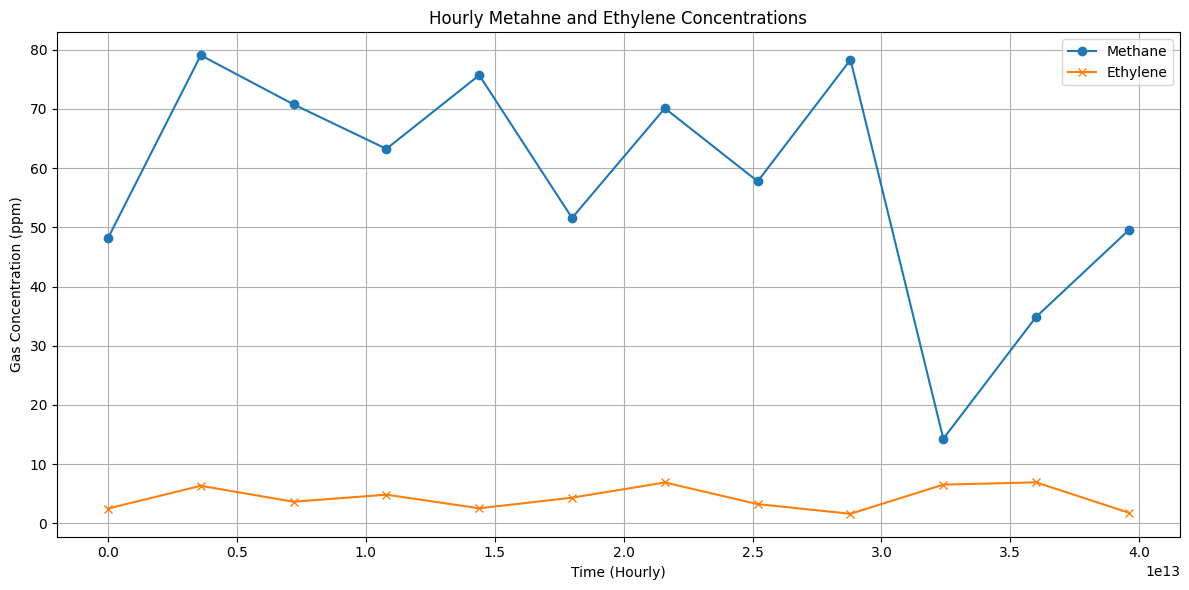

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df_meth_hourly.index, df_meth_hourly['Methane'], label='Methane', marker='o')
plt.plot(df_meth_hourly.index, df_meth_hourly['Ethylene'], label='Ethylene', marker='x')
plt.xlabel('Time (Hourly)')
plt.ylabel('Gas Concentration (ppm)')
plt.title('Hourly Metahne and Ethylene Concentrations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plotting Concentration

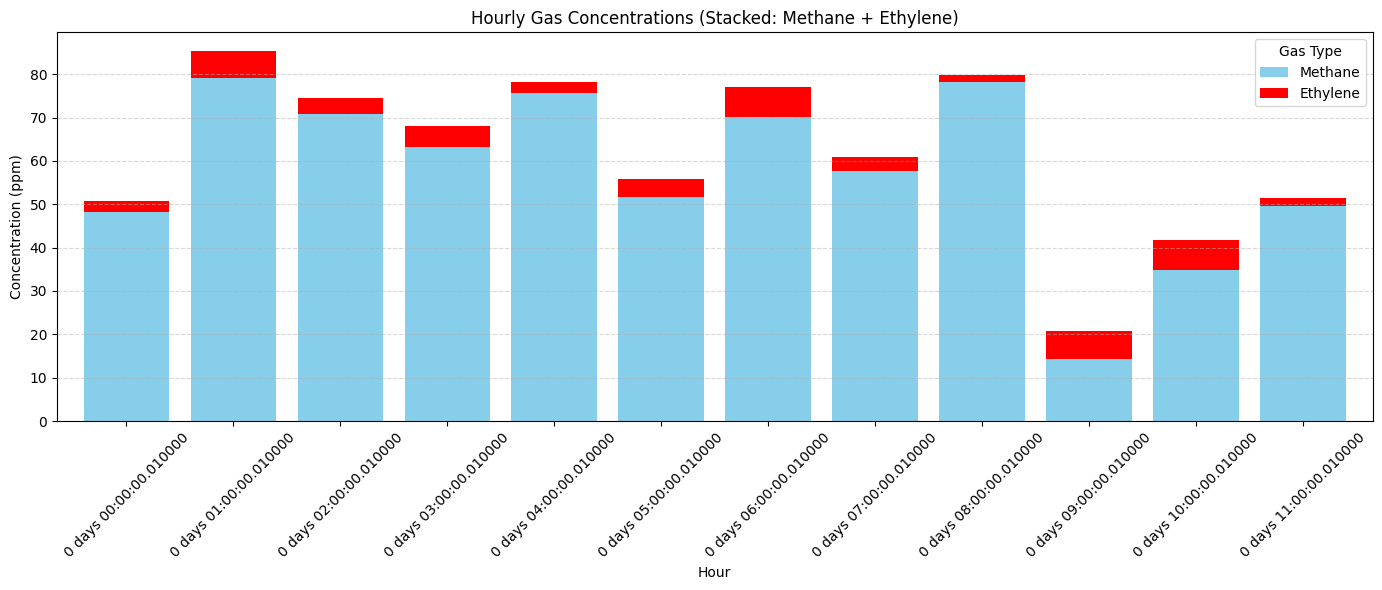

In [16]:
gas_cols = ['Methane', 'Ethylene']

# Plot stacked bar
df_meth_hourly[gas_cols].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    width=0.8,
    color=['skyblue', 'red']
)

plt.title("Hourly Gas Concentrations (Stacked: Methane + Ethylene)")
plt.xlabel("Hour")
plt.ylabel("Concentration (ppm)")
plt.xticks(rotation=45)
plt.legend(title="Gas Type")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Taking out the sensor data and doing train test split.

In [17]:
X = df_meth_minute[[f'Sensor_{i}' for i in range(1, 17)]]
y = df_meth_minute[['Methane', 'Ethylene']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [18]:
X

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16
Time,,,,,,,,,,,,,,,,
0 days 00:00:00.010000,2227.590808,2049.965821,3460.227628,3812.660613,2490.920260,3129.629853,2886.546714,3208.051157,3482.733914,2780.119648,2992.039098,2883.695039,2790.420370,3143.886878,2638.824839,2241.759997
0 days 00:01:00.010000,2199.673677,2004.985553,1485.952337,1635.067575,938.478388,1217.331982,1353.527252,1462.300412,3275.688408,2637.498068,1316.160947,1146.061055,919.812842,929.331108,1285.843852,1006.344523
0 days 00:02:00.010000,2082.406518,1979.437894,2486.440912,2819.493587,2545.188273,3338.670768,2415.959314,2825.267265,3140.649181,2515.850810,1712.505655,1813.991153,2399.743309,2568.738743,1794.877508,1588.131041
0 days 00:03:00.010000,2021.114953,1964.825603,2656.280922,2987.009208,2355.583620,3031.481462,2411.165630,2765.579233,3041.173712,2423.512672,1881.674005,1909.287778,2159.550157,2344.539592,1830.902448,1592.061198
0 days 00:04:00.010000,2339.929398,1955.871965,4173.640572,4448.188837,1454.048683,1619.261955,4327.642833,4610.945502,3330.932327,2642.637547,4036.177520,3347.386020,1315.469187,1467.121948,4139.400128,3245.963533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 11:32:00.010000,2448.197210,1601.419158,1680.576753,1873.477107,1124.001813,1416.531338,1461.869487,1616.202617,3346.576998,2670.404350,1366.618740,1182.177898,1024.699862,1042.077562,1272.833955,1011.868518
0 days 11:33:00.010000,2447.030587,1602.084833,2431.478795,2729.202788,2568.481893,3428.646042,2392.811760,2811.898233,3398.104235,2719.683068,1602.642000,1667.347883,2369.574758,2513.219702,1719.373403,1505.567082
0 days 11:34:00.010000,2434.833120,1603.031855,3618.658218,4037.569553,3511.892990,4594.936282,3228.383648,3781.775647,3416.596402,2718.437090,2330.129940,2381.026402,3156.725965,3424.344008,2236.559610,1977.514602


Scaling and transforming data

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying Linear Regression

In [20]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Linear Regression R²: 0.9034553312726391
MSE: 176.10697980716705


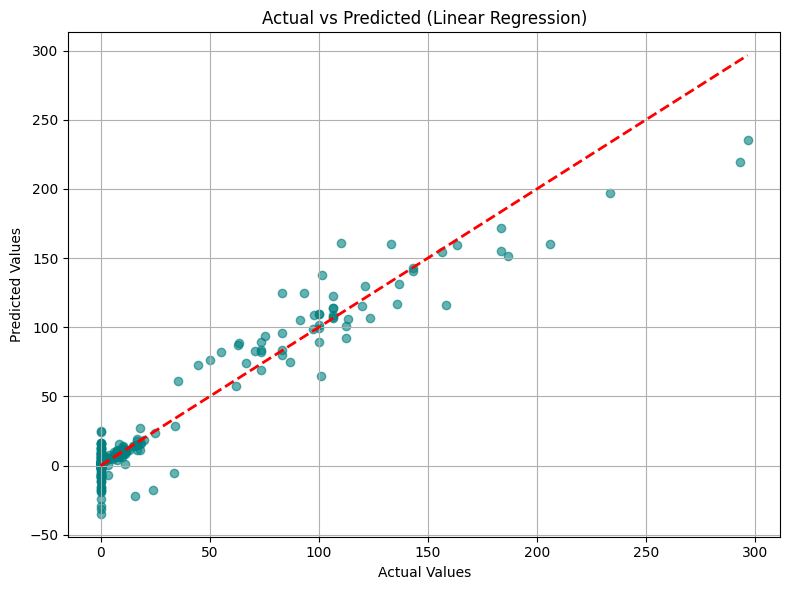

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest Regressor

In [22]:
#Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=41)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R²: 0.8051384822198482
MSE: 286.25678388521317


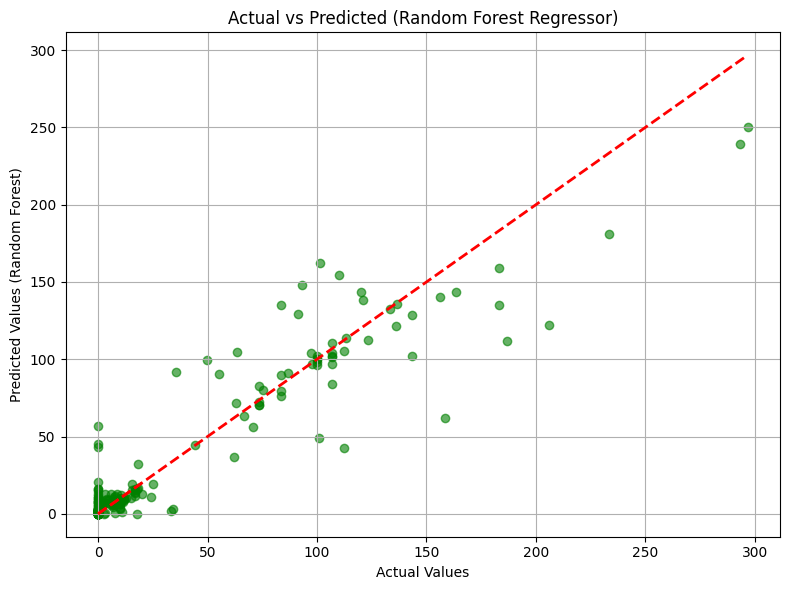

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Random Forest)")
plt.title("Actual vs Predicted (Random Forest Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Polynomial Features

Applying Polynomial regression metrics

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=21
)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Polynomial Regression linear regression

In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = model.predict(X_test_scaled)

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 157.7198303672165
R² Score: 0.887406790125473


Applied Ridge Regression

### Ridge regression

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1) 
ridge.fit(X_train_scaled, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [31]:
y_pred = ridge.predict(X_test_scaled)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')

In [33]:
print("Ridge Regression with Polynomial Features:")
print("Mean Squared Error (MSE):", mse)
print("R² Score (avg):", r2)

Ridge Regression with Polynomial Features:
Mean Squared Error (MSE): 117.81316390671147
R² Score (avg): 0.9176819192559622


#### RF Regressor model on poly features

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=23)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = rf_model.predict(X_test_scaled)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='uniform_average')

print("Random Forest with Polynomial Features:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Random Forest with Polynomial Features:
Mean Squared Error (MSE): 431.4854425001923
R² Score: 0.7577859809922134


## Using MLP

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
# X = Sensor_1 to Sensor_16
X = df_meth_minute[[f'Sensor_{i}' for i in range(1, 17)]].values

# y = Both Methane and Ethylene
y = df_meth_minute[['Methane', 'Ethylene']].values  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

# Scale features (only X is scaled, y is kept as-is)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [39]:
class MLPRegressor(nn.Module):
    def __init__(self):
        super(MLPRegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 63),
            nn.ReLU(),
            nn.Linear(63, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)  
        )

    def forward(self, x):
        return self.net(x)



In [40]:
model = MLPRegressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 500
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 20/500, Loss: 346.2263
Epoch 40/500, Loss: 94.2959
Epoch 60/500, Loss: 97.0292
Epoch 80/500, Loss: 283.3275
Epoch 100/500, Loss: 68.8643
Epoch 120/500, Loss: 71.4482
Epoch 140/500, Loss: 163.2644
Epoch 160/500, Loss: 26.4615
Epoch 180/500, Loss: 29.0720
Epoch 200/500, Loss: 82.6991
Epoch 220/500, Loss: 247.4178
Epoch 240/500, Loss: 321.9891
Epoch 260/500, Loss: 125.6269
Epoch 280/500, Loss: 74.2464
Epoch 300/500, Loss: 73.7977
Epoch 320/500, Loss: 30.5575
Epoch 340/500, Loss: 48.0434
Epoch 360/500, Loss: 31.6908
Epoch 380/500, Loss: 20.4325
Epoch 400/500, Loss: 13.8717
Epoch 420/500, Loss: 118.5939
Epoch 440/500, Loss: 45.7543
Epoch 460/500, Loss: 19.5365
Epoch 480/500, Loss: 11.4347
Epoch 500/500, Loss: 32.6047


In [41]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor).item()
    r2 = 1 - mse / torch.var(y_test_tensor).item()

print(f"\nTest MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Test MSE: 214.8829
R² Score: 0.9273


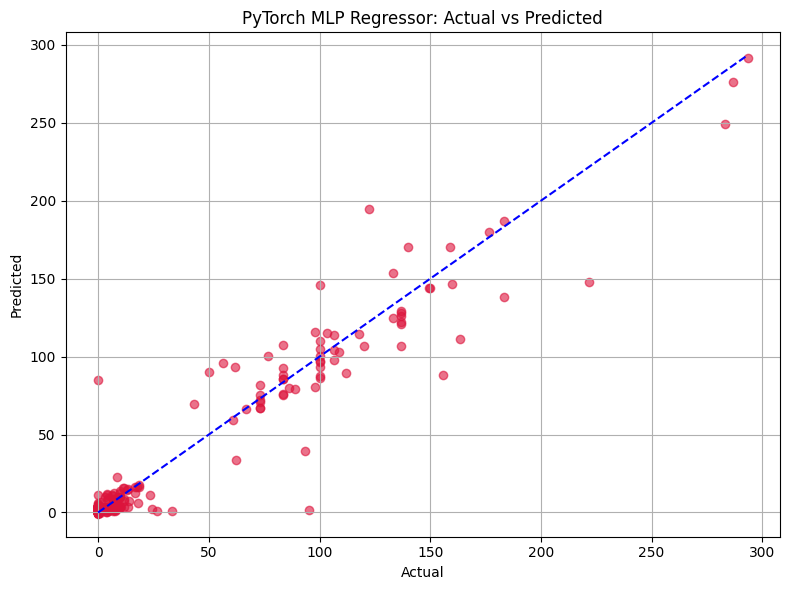

In [42]:
y_pred_np = y_pred.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.6, color='crimson')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'b--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PyTorch MLP Regressor: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the acquired values for comparison

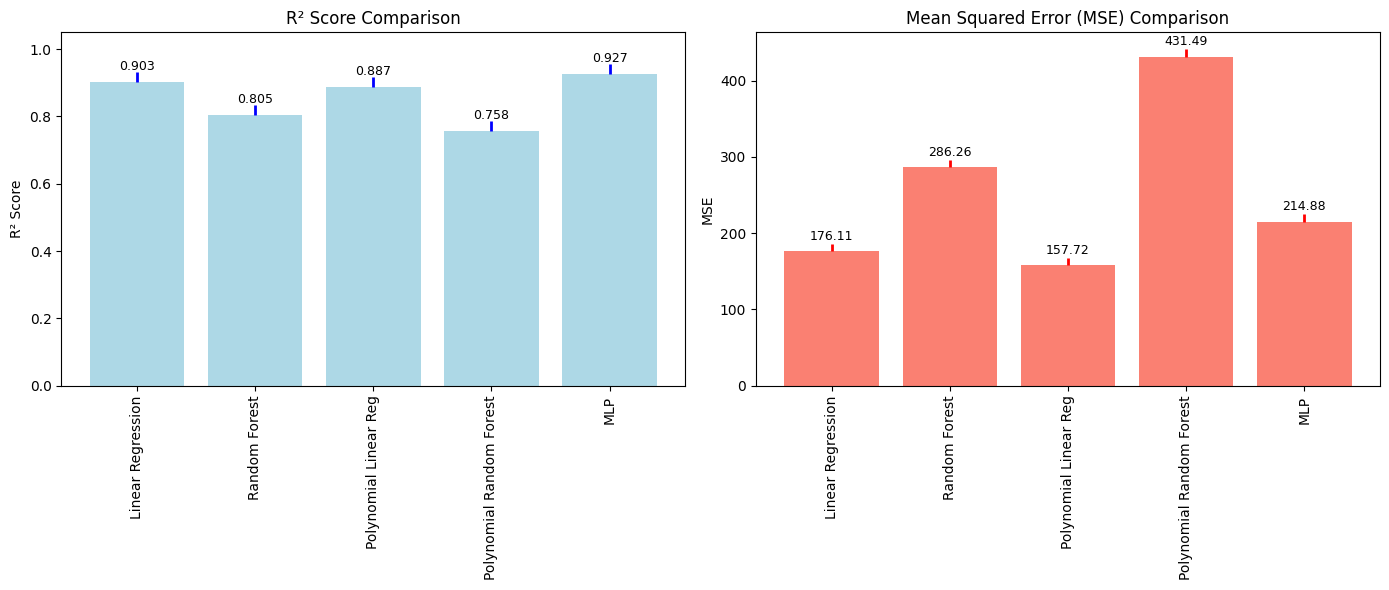

In [51]:
models = ["Linear Regression","Random Forest","Polynomial Linear Reg","Polynomial Random Forest","MLP"]

r2_scores = [0.9035,0.8051,0.8874,0.7578,0.9273]

mse_scores = [176.11,286.26,157.72,431.49,214.88]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for R² Scores
bars1 = axs[0].bar(models, r2_scores, color='lightblue')
axs[0].set_title("R² Score Comparison")
axs[0].set_ylabel("R² Score")
axs[0].set_ylim(0, 1.05)
axs[0].tick_params(axis='x', rotation=90)

# Add vertical lines above each R² bar
for bar in bars1:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    axs[0].vlines(x=x, ymin=y, ymax=y + 0.03, color='blue', linewidth=2)
    axs[0].annotate(f"{y:.3f}", (x, y + 0.035), ha='center', fontsize=9)

# Bar plot for MSE
bars2 = axs[1].bar(models, mse_scores, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) Comparison")
axs[1].set_ylabel("MSE")
axs[1].tick_params(axis='x', rotation=90)

# Add vertical lines above each MSE bar
for bar in bars2:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    axs[1].vlines(x=x, ymin=y, ymax=y + 10, color='red', linewidth=2)
    axs[1].annotate(f"{y:.2f}", (x, y + 15), ha='center', fontsize=9)

# Final layout
plt.tight_layout()
plt.show()
